In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = {
    'customer_id': [1, 1, 2, 2, 1, 3],
    'customer_name': ['Piyush', 'Piyush', 'Anita', 'Anita', 'Piyush', 'Ravi'],
    'transaction_date': pd.to_datetime(['2025-05-01', '2025-05-02', '2025-05-02', '2025-05-03', '2025-05-04', '2025-05-04']),
    'amount': [2000, -1000, 150000, -5000, 3000, 10000],
    'transaction_type': ['deposit', 'withdrawal', 'deposit', 'withdrawal', 'deposit', 'deposit']
}
df = pd.DataFrame(data)

In [13]:
print(df)

   customer_id customer_name transaction_date  amount transaction_type
0            1        Piyush       2025-05-01    2000          deposit
1            1        Piyush       2025-05-02   -1000       withdrawal
2            2         Anita       2025-05-02  150000          deposit
3            2         Anita       2025-05-03   -5000       withdrawal
4            1        Piyush       2025-05-04    3000          deposit
5            3          Ravi       2025-05-04   10000          deposit


In [15]:
# Total Transaction 
print("Total number of transactions:", len(df))




Total number of transactions: 6


In [17]:
# Total deposits
total_deposits = df[df['transaction_type'] == 'deposit']['amount'].sum()
print("Total Deposits:", total_deposits)

# Total withdrawals
total_withdrawals = df[df['transaction_type'] == 'withdrawal']['amount'].sum()
print("Total Withdrawals:", total_withdrawals)


Total Deposits: 165000
Total Withdrawals: -6000


In [19]:
# Total amount by customer
customer_summary = df.groupby('customer_name')['amount'].sum().reset_index()
customer_summary.columns = ['Customer', 'Net Transaction Amount']
print("\nCustomer Summary:")
print(customer_summary)


Customer Summary:
  Customer  Net Transaction Amount
0    Anita                  145000
1   Piyush                    4000
2     Ravi                   10000


In [21]:
# Add month column
df['month'] = df['transaction_date'].dt.to_period('M')

monthly_summary = df.groupby('month')['amount'].sum().reset_index()
print("\nMonthly Transaction Summary:")
print(monthly_summary)


Monthly Transaction Summary:
     month  amount
0  2025-05  159000


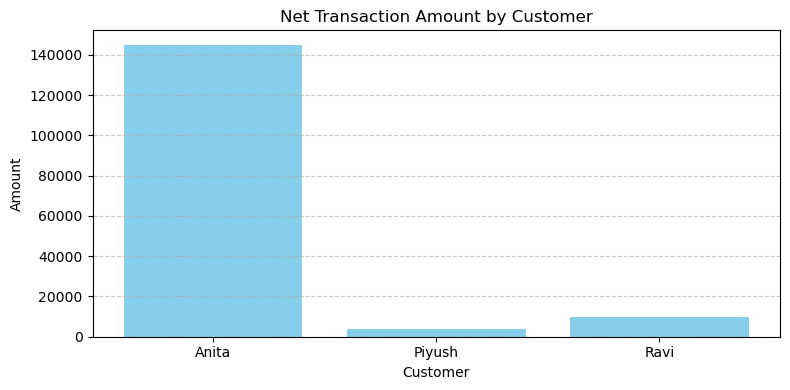

In [31]:
#Customer-wise Net Transaction Bar Chart
customer_summary = df.groupby('customer_name')['amount'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(customer_summary['customer_name'], customer_summary['amount'], color='skyblue')
plt.title('Net Transaction Amount by Customer')
plt.xlabel('Customer')
plt.ylabel('Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


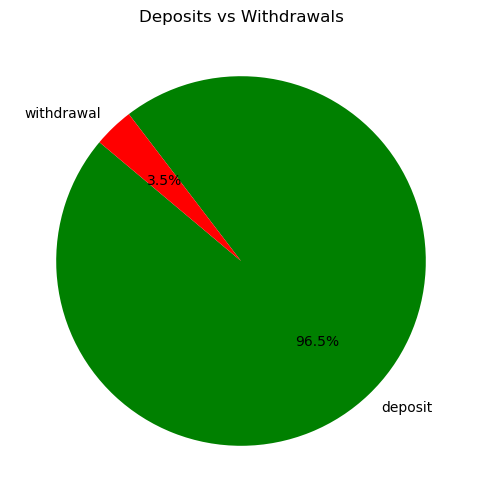

In [37]:
# Sum of amounts by transaction type (convert withdrawals to positive)
type_summary = df.copy()
type_summary.loc[type_summary['transaction_type'] == 'withdrawal', 'amount'] *= -1

# Group by transaction_type
pie_data = type_summary.groupby('transaction_type')['amount'].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Deposits vs Withdrawals')
plt.show()